In [21]:
!pip install folium
!pip install  matplotlib
!pip install  mapclassify

     -------------------------------------- 102.3/102.3 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import geopandas as gpd
import osmnx as ox
import xgboost as xgb
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,RandomForestClassifier
import time 
import pandas as pd
import matplotlib.pyplot as plt
from shapely import geometry
from utils import get_buildings_iris

In [12]:
path=r"Y:\RECHERCHE ET DEV\10_Modèle d'attractivite des rues\04_données clients (source)\osm\paris"

In [113]:
data=pd.read_pickle(path+r'\building_level_filled.pkl').to_crs('EPSG:4326')
shops=pd.read_pickle(path+r'\shops.pkl').to_crs('EPSG:4326')
est_pop=pd.read_pickle(path+r'\buildings_est_pop.pkl').to_crs('EPSG:4326')

In [80]:
transport=pd.read_pickle(path+r'\public_transport.pkl').to_crs('EPSG:4326')

In [83]:
transport['public_transport'].value_counts()

platform                3405
stop_position           2861
station                  250
platform_section          92
yes                       48
departures_board           4
disued_stop_position       3
stop_area                  1
hub                        1
Name: public_transport, dtype: int64

In [71]:
buildings = pickle.load(open(path + r'\building_level_filled.pkl',
                             'rb')).to_crs('EPSG:4326')

# In[137]:

contour_iris = gpd.read_file(
    r'Y:\REFERENTIEL DATA\RP 2022 FRANCE\CARTOGRAPHIE\Cartographie_France_IRIS_2019\CONTOURS-IRIS_2-1_SHP_LAMB93_FXX-2019\CONTOURS-IRIS.shp'
).to_crs('EPSG:4326')

# In[138]:

iris_data = pd.read_excel(
    'Y:\REFERENTIEL DATA\RP 2022 FRANCE\GEODATA - IRIS\Geodata_IRIS_essentiels.xlsx'
)


In [32]:
data=pd.read_pickle(path+r'\building.pkl').to_crs('EPSG:4326')

In [39]:
(buildings['building']=="yes").sum()

75189

In [35]:
buildings = pickle.load(open(path + r'\building_level_filled.pkl',
                             'rb')).to_crs('EPSG:4326')

In [112]:
for i,row in buildings.iterrows():
    try:
        if "gare" in row['name'].strip().lower():
            print(row)
    except:
        pass

geometry           POLYGON ((2.3189142 48.83860409999999, 2.31921...
building                                               train_station
shop                                                             NaN
building:levels                                                  9.0
amenity                                                          NaN
name                              Gare Montparnasse 2 - Hall Pasteur
street                                                           NaN
postcode                                                         NaN
housenumber                                                      NaN
city                                                             NaN
is_h                                                             0.0
Name: (way, 29402542), dtype: object
geometry           POLYGON ((2.3654314 48.84170319999999, 2.36541...
building                                               train_station
shop                                                             N

geometry           POLYGON ((2.3764706999999996 48.8463153, 2.376...
building                                                       hotel
shop                                                             NaN
building:levels                                                  6.0
amenity                                                          NaN
name                                       Ibis Gare De Lyon Diderot
street                                                           NaN
postcode                                                         NaN
housenumber                                                      NaN
city                                                             NaN
is_h                                                             0.0
Name: (way, 78145490), dtype: object
geometry           POLYGON ((2.3880701 48.828935099999995, 2.3882...
building                                              transportation
shop                                                             N

geometry           POLYGON ((2.32547 48.824585799999994, 2.325564...
building                                               train_station
shop                                                             NaN
building:levels                                                  2.0
amenity                                                          NaN
name                                      Gare de Montrouge-Ceinture
street                                                           NaN
postcode                                                         NaN
housenumber                                                      NaN
city                                                             NaN
is_h                                                             0.0
Name: (way, 318617853), dtype: object
geometry           POLYGON ((2.3146411999999996 48.8625401, 2.314...
building                                               train_station
shop                                                             

geometry           POLYGON ((2.3572622 48.8758099, 2.3572554 48.8...
building                                                       hotel
shop                                                             NaN
building:levels                                                  6.0
amenity                                                          NaN
name                           Ibis Styles - Paris Gare de l'Est TGV
street                                                           NaN
postcode                                                         NaN
housenumber                                                      NaN
city                                                             NaN
is_h                                                             0.0
Name: (relation, 983994), dtype: object


In [58]:
buildings[buildings['building']!="yes"]['is_h'].value_counts()#80

1.0    22547
0.0     5587
Name: is_h, dtype: int64

In [59]:
buildings[buildings['building']=="yes"]['is_h'].value_counts()#55

0.0    42052
1.0    33137
Name: is_h, dtype: int64

In [62]:
buildings['is_h'].value_counts()#55

1.0    55684
0.0    47639
Name: is_h, dtype: int64

<Axes: >

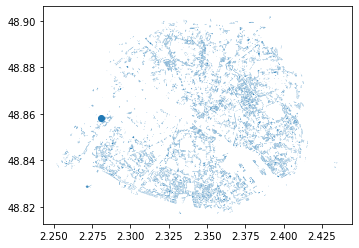

In [49]:
buildings[buildings['building']=="apartments"].plot()

In [104]:
zzz=iris_data[iris_data["DEP"]=="75"]
zzz[zzz["COM"]=="75110"]

,CODE_IRIS,REG,DEP,UU2010,COM,LIBCOM,TRIRIS,GRD_QUART,LIBIRIS,TYP_IRIS,...,S9_1_L_Cuisines,S9_2_L_Fenêtres,S9_3_L_Volets,S9_4_L_Salles_de_bains,S9_5_L_Placards,S9_6_L_Portes_extérieurs,S9_7_L_Sols,S9_8_L_Portails,S9_9_L_Portes_intérieures,S9_10_L_Escaliers
37975,751103701,11,75,00851,75110,Paris 10e Arrondissement,750531,7511037,Saint-Vincent de Paul 1,H,...,226392.428631,231012.682277,94253.174369,94253.174369,30801.690970,35267.936161,62835.449579,47126.587184,19559.073766,11704.642569
37976,751103702,11,75,00851,75110,Paris 10e Arrondissement,750531,7511037,Saint-Vincent de Paul 2,H,...,193683.722109,197636.451131,80635.672062,80635.672062,26351.526818,30172.498206,53757.114708,40317.836031,16733.219529,10013.580191
37977,751103703,11,75,00851,75110,Paris 10e Arrondissement,750631,7511037,Saint-Vincent de Paul 3,H,...,211357.140801,215670.551837,87993.585150,87993.585150,28756.073578,32925.704247,58662.390100,43996.792575,18260.106722,10927.307960
37978,751103704,11,75,00851,75110,Paris 10e Arrondissement,750631,7511037,Saint-Vincent de Paul 4,H,...,253605.464072,258781.085788,105582.683002,105582.683002,34504.144772,39507.245764,70388.455334,52791.341501,21910.131930,13111.575013
37979,751103705,11,75,00851,75110,Paris 10e Arrondissement,750511,7511037,Saint-Vincent de Paul 5,H,...,235084.740342,239882.388104,97872.014346,97872.014346,31984.318414,36622.044584,65248.009564,48936.007173,20310.042193,12154.040997
37980,751103706,11,75,00851,75110,Paris 10e Arrondissement,750511,7511037,Saint-Vincent de Paul 6,H,...,249890.069957,254989.867303,104035.865859,104035.865859,33998.648974,38928.453075,69357.243906,52017.932930,21589.142098,12919.486610
37981,751103707,11,75,00851,75110,Paris 10e Arrondissement,750521,7511037,Saint-Vincent de Paul 7,H,...,168014.762628,171443.635334,69949.003216,69949.003216,22859.151378,26173.728328,46632.668811,34974.501608,14515.561125,8686.477524
37982,751103708,11,75,00851,75110,Paris 10e Arrondissement,750521,7511037,Saint-Vincent de Paul 8,H,...,194787.585366,198762.842210,81095.239622,81095.239622,26501.712295,30344.460577,54063.493081,40547.619811,16828.587307,10070.650672
37983,751103709,11,75,00851,75110,Paris 10e Arrondissement,750531,7511037,Saint-Vincent de Paul 9,H,...,288570.528942,294459.723411,120139.567152,120139.567152,39261.296455,44954.184441,80093.044768,60069.783576,24930.923249,14919.292653
37984,751103710,11,75,00851,75110,Paris 10e Arrondissement,750631,7511037,Saint-Vincent de Paul 10,A,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [127]:

aa=get_buildings_iris("751103704",contour_iris,iris_data,buildings,False)
aa=aa[aa['building']=="yes"]
aa.explore("is_h")

In [17]:
rues=pd.read_pickle(path+r'\ways.pkl').to_crs('EPSG:4326')

In [16]:
shops_gsa=pickle.load(open(path+r"\..\..\association\GSA_association.pkl",'rb'))

In [25]:
shops.loc[shops_gsa['shop'].to_list(),"shop"].value_counts()
    

supermarket         494
convenience         285
frozen_food         110
houseware             1
clothes               1
department_store      1
grocery               1
cheese                1
anime                 1
Name: shop, dtype: int64

In [11]:
for i ,row in shops.iterrows():
    if type(row['name'])=="str" and "carrefour"  in row['name'].strip().lower():
       
            print(row['building'])

In [18]:
data[data.contains(geometry.Point(48.869771,2.3354035,20))]

,,geometry,building,shop,building:levels,amenity,name,street,postcode,housenumber,city,is_h
element_type,osmid,,,,,,,,,,,


In [38]:
data['is_h'].

is_h
1.0    55684
0.0    47639
Name: count, dtype: int64

In [40]:
tags = {"shop":True }   
shops = ox.geometries_from_place("Paris", tags)

In [47]:
shops.bar.value_counts()

bar
yes    1
Name: count, dtype: int64

In [43]:
for i in shops:
    if i not in shops['shop'].value_counts().index:
        print(i)
        

addr:postcode
address
amenity
brand
brand:wikidata
brand:wikipedia
compressed_air
fuel:GTL_diesel
fuel:adblue
fuel:diesel
fuel:e10
fuel:e85
fuel:octane_98
name
opening_hours
operator
ref:FR:prix-carburants
shop
source
toilets
vending
vending_machine
geometry
fuel:lpg
opening_hours:covid19
alt_name
short_name
name:en
name:fr
access:covid19
contact:city
contact:housenumber
contact:postcode
contact:street
takeaway:covid19
addr:city
addr:housenumber
addr:street
wheelchair
email
name:ko
piano
website
wikidata
wikipedia
check_date
changing_table
contact:website
level
organic
origin
name:ru
entrance
name:signed
payment:credit_cards
payment:debit_cards
branch
fax
contact:phone
check_date:opening_hours
cuisine
operator:wikidata
operator:wikipedia
bakehouse
produced_on_site
stroller
int_name
old_name
description
service:bicycle:pump
service:bicycle:repair
service:bicycle:retail
service:bicycle:second_hand
payment:mastercard
payment:visa
brand:website
dog
self_service
owner
payment:cash
shop_1
de